# Modelo SIR: Uma abordagem estocástica e determinística

- PET - Física
- Petianos: Ylana Karolina Santos Lopes
- Data: 11 de Abril de 2025

$\quad$ O presente `Notebook` tem como objetivo o estudo do modelo SIR, um modelo matemático simples usado em epidemologia para descrever a propagação de doenças infeciosas. Adotaremos uma abordagem comparativa, analisando o comportamento modelo na sua forma determinísca e estocástica. Dessa forma, este trabalho introduzirá conceitos chave de epidemologia e propagação de doenças, como também discutirá o algoritmo de Gillepse que foi implementado para a abordagem estocástica. Este `Notebook` será organizado da seguinte forma:

1. *Introdução;*
2. *Modelo Matemático;*
3. *Abordagem Determinística;*
4. *Abordagem Estocástica;*
5. *Comparação;*
6. *Conclusão*

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint


## Detalhes das bibliotecas

In [3]:
%load_ext version_information
%version_information matplotlib, numpy, scipy

ModuleNotFoundError: No module named 'version_information'

## 1. Introdução
$\quad$ Epidemias são as responsáveis por mta coisa, menção covid 19 é interessante ver como elas evoluem pipipopo



In [49]:
##Definimos uma função para ter as equações diferencias do Modelos SIS, lembrando que y[0]=s, y[1]=i, y[2]=r
def dydt_SIR(y, t, beta,mu):
    dydt=[0,0,0]
    dydt[0]=-beta*y[0]*y[1] 
    dydt[1]= beta*y[0]*y[1] - mu*y[1]
    dydt[2]= mu*y[1]
    return dydt

In [50]:
#Definimos os parametros e condições iniciais
mu = 0.1
beta=0.4
y0 = [0.99,0.01, 0]
t = np.linspace(0, 50, 100)

    #Resolvemos o sistema de equações diferenciais usando a função odeint
sol_SIS = odeint(dydt_SIR, y0, t, args=(beta, mu))

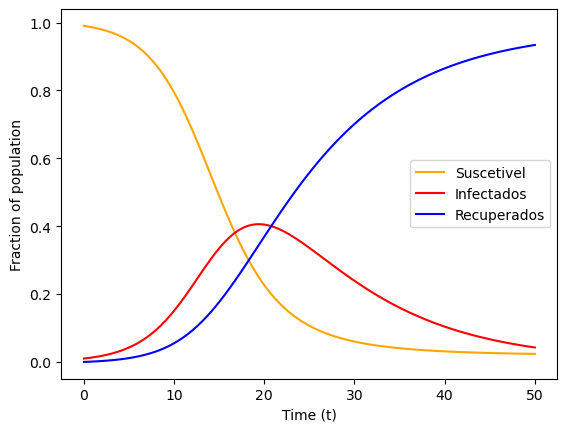

In [36]:
plt.plot(t, sol_SIS[:, 0], 'orange', label='Suscetivel')
plt.plot(t, sol_SIS[:, 1], 'red', label='Infectados')
plt.plot(t, sol_SIS[:, 2], "blue", label="Recuperados")
plt.xlabel("Time (t)")
plt.ylabel("Fraction of population")
plt.legend()

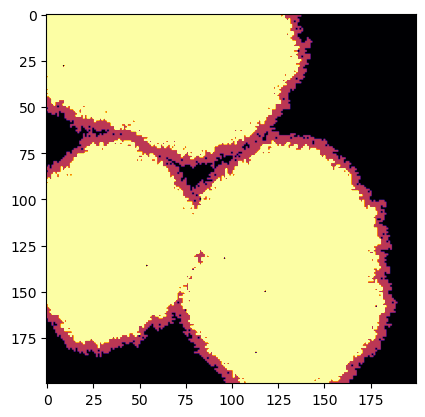

In [45]:
# Grid size
N = 200
infection_rate = 0.4  # Probability of infection from an infected neighbor
recovery_time = 10    # Time steps before an infected person recovers

# States
SUSCEPTIBLE = 0  # Blue
INFECTED = 1     # Red
RECOVERED = 3    # Green

# Initialize the grid
grid = np.zeros((N, N), dtype=int)

# Introduce a few initial infections randomly
num_initial_infected = 6
for _ in range(num_initial_infected):
    x, y = np.random.randint(0, N, 2)
    grid[x, y] = INFECTED

# Track infection time for each cell
infection_timer = np.zeros((N, N), dtype=int)

# Function to update the grid for each time step
def update(frame):
    global grid, infection_timer
    new_grid = grid.copy()
    
    for x in range(N):
        for y in range(N):
            if grid[x, y] == SUSCEPTIBLE:  # If susceptible, check neighbors
                neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
                neighbors = [(i, j) for i, j in neighbors if 0 <= i < N and 0 <= j < N]
                if any(grid[i, j] == INFECTED for i, j in neighbors):
                    if np.random.rand() < infection_rate:
                        new_grid[x, y] = INFECTED  # Infection occurs
            
            elif grid[x, y] == INFECTED:  # If infected, update recovery timer
                infection_timer[x, y] += 1
                if infection_timer[x, y] >= recovery_time:
                    new_grid[x, y] = RECOVERED  # Recover after set time

    grid[:] = new_grid  # Update grid

    # Update visualization
    img.set_array(grid)
    return img,

# Set up the figure for animation
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap="inferno", vmin=0, vmax=2)

# Create animation

ani = animation.FuncAnimation(fig, update, frames=100, interval=100, blit=False)
ani.save('sir_simulation.gif', writer='pillow', fps=10)



![SIR Model Simulation](sir_simulation.gif)

In [ ]:
def gillespie_algorithm(reactions, initial_state, total_population, t_max):
    """ Implements the pure Gillespie algorithm for any reaction system. """
    state = (np.array(initial_state) * total_population).astype(int)
    t = 0
    times = [t]
    states = [state.copy() / total_population]  # Normalize initial state
    
    while t < t_max:
        rates = np.array([reaction[0](*state) for reaction in reactions])
        total_rate = np.sum(rates)
        
        if total_rate == 0:
            break
        
        dt = np.random.exponential(1 / total_rate)
        t += dt
        
        chosen_reaction = np.random.choice(len(reactions), p=rates / total_rate)
        state += reactions[chosen_reaction][1]
        
        times.append(t)
        states.append(state.copy() / total_population)  # Normalize state
        
    return times, np.array(states)


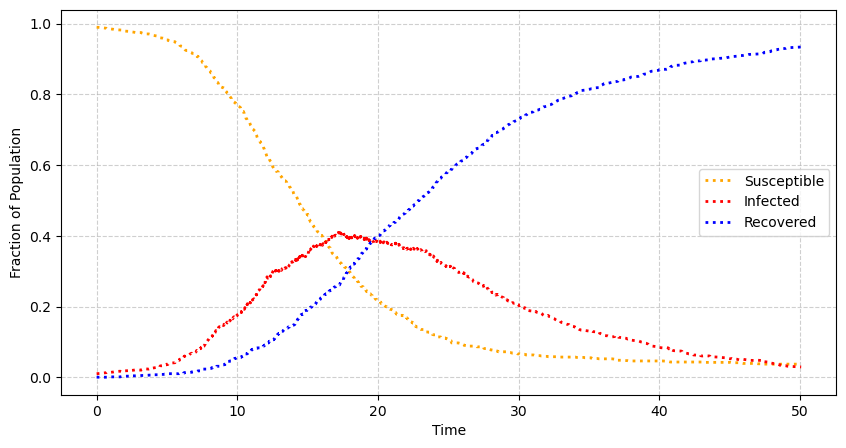

In [52]:
# Define SIR model parameters
beta = 0.4 / 1000  # Match deterministic model by scaling with population
gamma = 0.1    # Recovery rate
total_population = 1000  # Total population

# Define infection and recovery rate functions
def infection_rate(S, I, R):
    return beta * S * I

def recovery_rate(S, I, R):
    return gamma * I

# Define possible reactions with state changes
reactions = [
    (infection_rate, np.array([-1, 1, 0])),  # Susceptible -> Infected
    (recovery_rate, np.array([0, -1, 1]))   # Infected -> Recovered
]

# Run simulation
t_max = 50  # Match deterministic model time range
times, states = gillespie_algorithm(reactions, y0, total_population, t_max)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(times, states[:, 0], label='Susceptible', color='orange', ls = ':',linewidth=2)
plt.plot(times, states[:, 1], label='Infected', color='red', ls = ':', linewidth=2)
plt.plot(times, states[:, 2], label='Recovered', color='blue',ls = ':', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.legend()
#plt.title('Gillespie Algorithm Simulation for SIR Model (Normalized, Percentage-Based)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


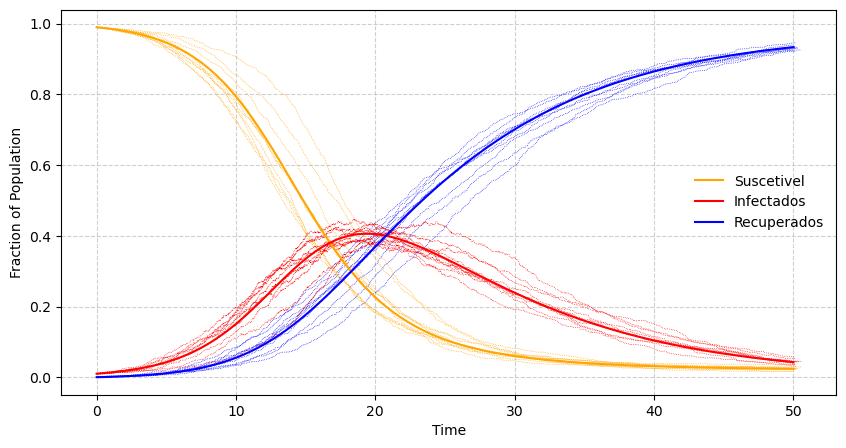

In [54]:
plt.figure(figsize=(10, 5))

# Run simulation
for i in range(0,10):
    t_max = 50  # Match deterministic model time range
    times, states = gillespie_algorithm(reactions, [S0_pct, I0_pct, R0_pct], total_population, t_max)

    plt.plot(times, states[:, 0], color='orange', ls = ':',linewidth=0.5)
    plt.plot(times, states[:, 1], color='red', ls = ':', linewidth=0.5)
    plt.plot(times, states[:, 2], color='blue',ls = ':', linewidth=0.5)

# Plot results
plt.plot(t, sol_SIS[:, 0], 'orange', label='Suscetivel')
plt.plot(t, sol_SIS[:, 1], 'red', label='Infectados')
plt.plot(t, sol_SIS[:, 2], "blue", label="Recuperados")
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.legend(frameon=False)
#plt.title('Gillespie Algorithm Simulation for SIR Model (Normalized, Percentage-Based)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## Referências
